# Анализ данных 

In [3]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [4]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
from feature_selector import FeatureSelector

In [31]:
data = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
train_labels = data['price_doc']

In [6]:
data.shape, data_test.shape

((30471, 292), (7662, 291))

In [11]:
data['price_doc'].to_csv('y.csv', header=True, index=True)

In [12]:
data_test['id']

0       30474
1       30475
2       30476
3       30477
4       30478
5       30479
6       30480
7       30481
8       30482
9       30483
10      30484
11      30485
12      30486
13      30487
14      30488
15      30489
16      30490
17      30491
18      30492
19      30493
20      30494
21      30495
22      30496
23      30497
24      30498
25      30499
26      30500
27      30501
28      30502
29      30503
        ...  
7632    38106
7633    38107
7634    38108
7635    38109
7636    38110
7637    38111
7638    38112
7639    38113
7640    38114
7641    38115
7642    38116
7643    38117
7644    38118
7645    38119
7646    38120
7647    38121
7648    38122
7649    38123
7650    38124
7651    38125
7652    38126
7653    38127
7654    38128
7655    38129
7656    38130
7657    38131
7658    38132
7659    38133
7660    38134
7661    38135
Name: id, Length: 7662, dtype: int64

In [7]:
data_test['id'].to_csv('answer.csv', header=True, index=True)

## Гистограмма цен

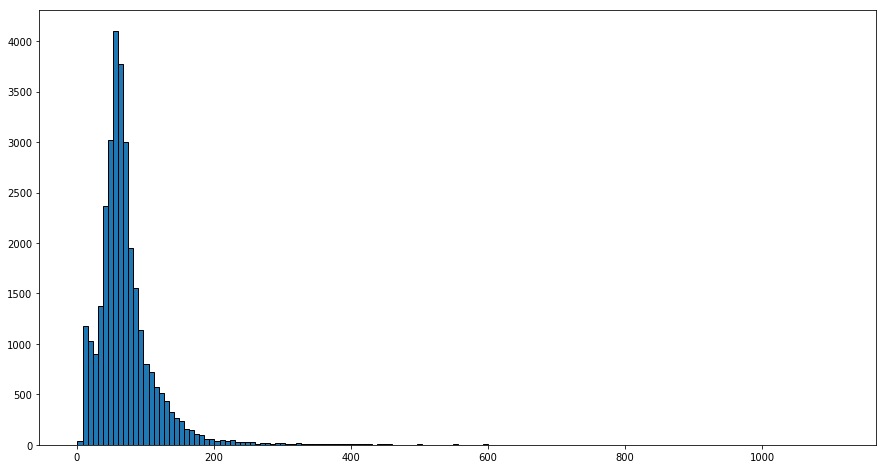

In [8]:
plt.figure(figsize=(15, 8))
plt.hist((data['price_doc'].values / 100000), bins = 150,  edgecolor = 'k');

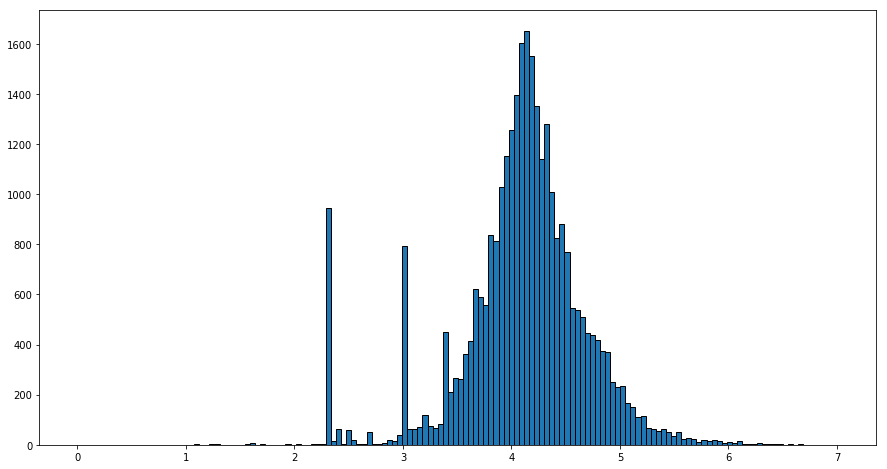

In [9]:
plt.figure(figsize = (15, 8))
plt.hist(np.log(data['price_doc'].values / 100000), bins = 150, edgecolor = 'k');

In [36]:
del data['price_doc']

In [11]:
data.shape, data_test.shape

((30471, 291), (7662, 291))

## Заполнение пропусков 

In [12]:
###########
# numeric #
###########
for col in data._get_numeric_data().columns[data._get_numeric_data().columns.isnull().any()].tolist():
    data[col].fillna(data[col].mean(), inplace=True)
    
for col in data_test._get_numeric_data().columns[data_test._get_numeric_data().columns.isnull().any()].tolist():
    data[col].fillna(data[col].mean(), inplace=True)

In [13]:
###############
# categorical #
###############
for col in data.columns[data.isnull().any()].tolist():
    data[col].fillna(data[col].value_counts().index[0], inplace=True)

for col in data_test.columns[data.isnull().any()].tolist():
    data[col].fillna(data[col].value_counts().index[0], inplace=True)

# Важность параметров

## Корреляция данных

In [14]:
corr = data.corr()

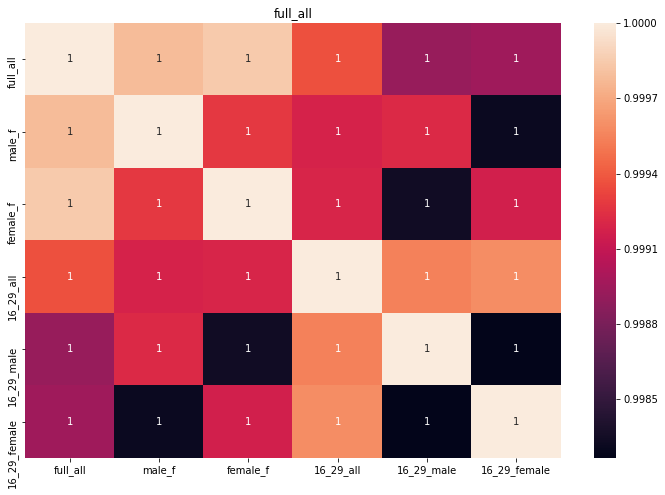

In [15]:
top_feature = corr.index[abs(corr['full_all'] > 0.9)]
plt.subplots(figsize=(12, 8))
top_corr = data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.title('full_all');
plt.show()

C:\Users\Anna_\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


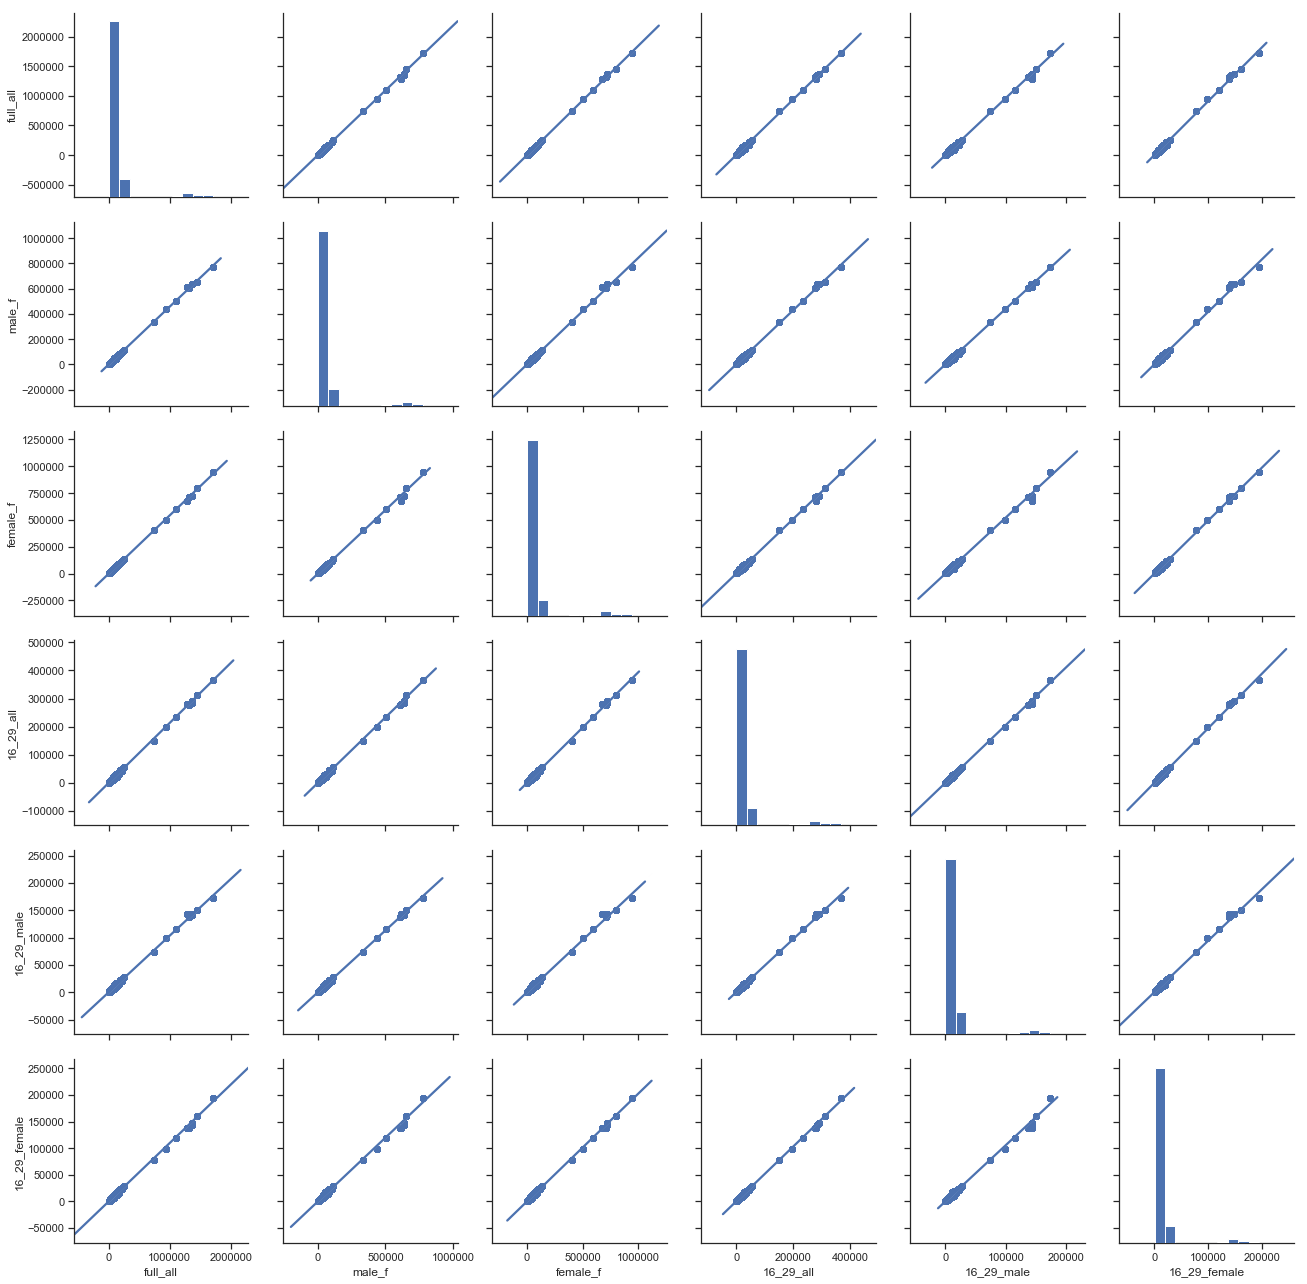

In [16]:
col = ['full_all','male_f', 'female_f', '16_29_all', '16_29_male', '16_29_female']
sns.set(style='ticks')
sns.pairplot(data[col], size=3, kind='reg')

In [17]:
fs.identify_collinear(correlation_threshold = 0.6)
collinear_features = fs.ops['collinear']

No labels provided. Feature importance based methods are not available.
227 features with a correlation magnitude greater than 0.60.



In [18]:
for col in collinear_features:
    data = data.drop([col], axis = 1)
    
for col in collinear_features:
    data_test = data_test.drop([col], axis = 1)

In [19]:
data.shape, data_test.shape

((30471, 64), (7662, 64))